# scipy stats

This notebook focuses on the use of the scipy.stats module

It is built based on a learn-by-example approach So it only covers a little part of the module's functionalities but provides a practical application.

Some knowledge of `numpy` and `matplotlib` is needed to fully understand the content.

## Introduction

The scipy.stats module provides mainly:
* probability distributions: continuous, discrete and multivariate
* statistical functions such as statistics and tests

For further details you can check [the official documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)

## Imports

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

## Probability distributions

The scipy.stats module provides a very complete set of probability distributions.

There are three types of distributions:
* Continuous
* Discrete
* Multivariate

Each of the univariate types is inherited from the same class, so they all have a common API.

### Continuos distributions

There are ~100 different continuous distributions. Some of the methods in the API:
* `cdf`: Cumulative Distribution Function
* `pdf`: Probability Density Function
* `rvs`: Random Variable Sample
* `ppf`: Percent Point Function (inverse of the CDF)
* `fit`: return MLE estimations of location, scale and shape, given a set of data

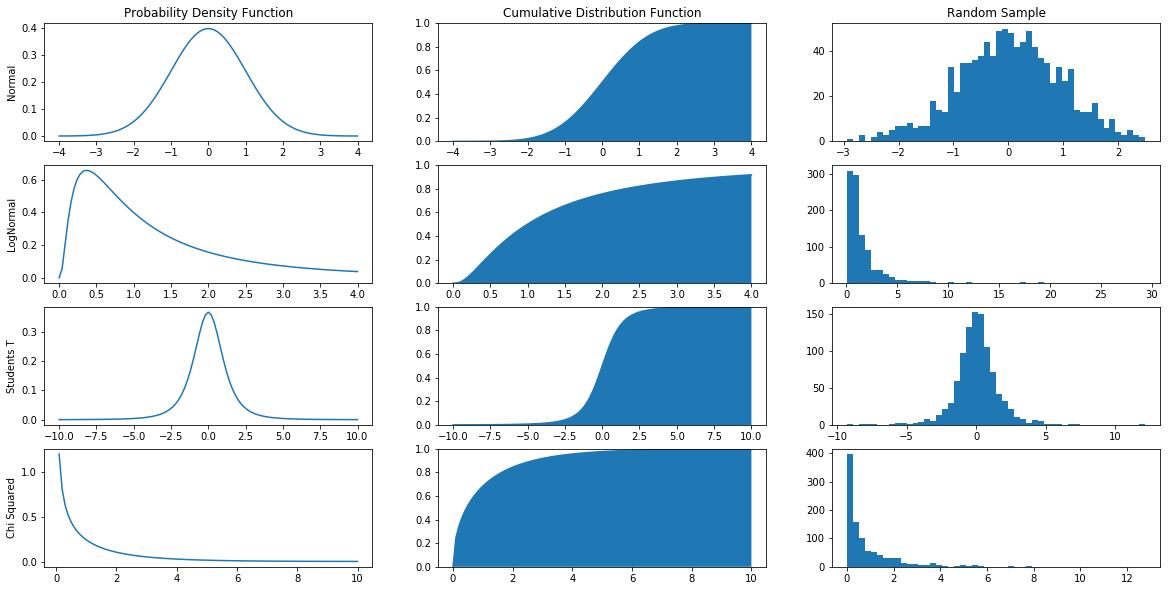

In [2]:
N_SAMPLES = 1000

pds = [('Normal', stats.norm(), (-4., 4.)), 
      ('LogNormal', stats.lognorm(1.), (0., 4.)),
      ('Students T', stats.t(3.), (-10., 10.)),
      ('Chi Squared', stats.chi2(1.), (0., 10.))]

n_pds = len(pds)
fig, ax_list = plt.subplots(n_pds, 3)
fig.set_size_inches((5.*n_pds, 10.))
for ind, elem in enumerate(pds):
    
    pd_name, pd_func, pd_range = elem

    x_range = np.linspace(*pd_range, 101)
    
    # Probability Density Function
    ax_list[ind, 0].plot(x_range, pd_func.pdf(x_range))
    ax_list[ind, 0].set_ylabel(pd_name)
    
    # Cumulative Distribution Function
    ax_list[ind, 1].plot(x_range, pd_func.cdf(x_range))
    ax_list[ind, 1].fill_between(x_range, pd_func.cdf(x_range))
    ax_list[ind, 1].set_ylim([0., 1.])
    
    # Random Variable Sample
    ax_list[ind, 2].hist(pd_func.rvs(size=N_SAMPLES), bins=50)
    
    if ind == 0:
        _ = ax_list[ind, 0].set_title('Probability Density Function')
        _ = ax_list[ind, 1].set_title('Cumulative Distribution Function')
        _ = ax_list[ind, 2].set_title('Random Sample')

## Discrete Distributions

Discrete distributions have quite the same API. Having `pmf`= Probability Mass Function (instead of pdf)

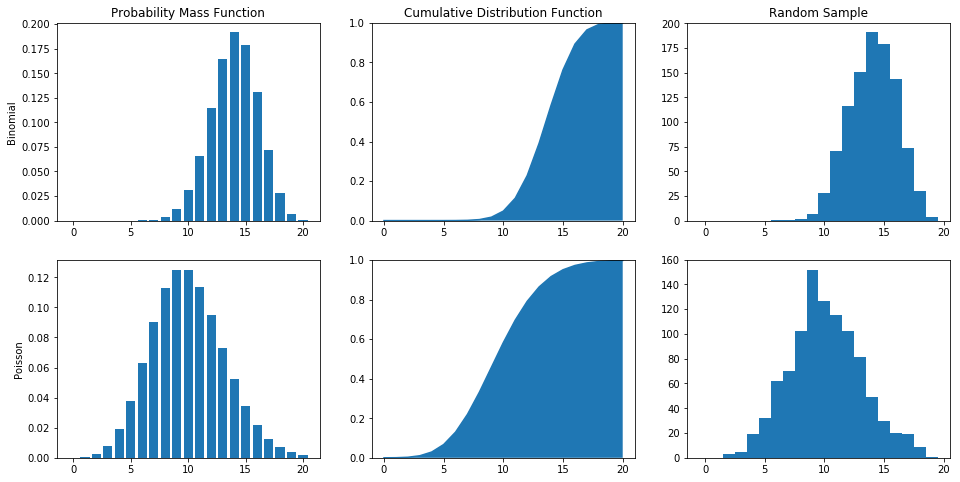

In [3]:
N_SAMPLES = 1000

pds = [('Binomial', stats.binom(20, 0.7), (0., 21.)),
      ('Poisson', stats.poisson(10.), (0., 21.))]

n_pds = len(pds)
fig, ax_list = plt.subplots(n_pds, 3)
fig.set_size_inches((8.*n_pds, 8.))
for ind, elem in enumerate(pds):
    
    pd_name, pd_func, pd_range = elem

    x_range = np.arange(*pd_range)
    
    # Probability Mass Function
    ax_list[ind, 0].bar(x_range, pd_func.pmf(x_range))
    ax_list[ind, 0].set_ylabel(pd_name)
    
    # Cumulative Distribution Function
    ax_list[ind, 1].plot(x_range, pd_func.cdf(x_range))
    ax_list[ind, 1].fill_between(x_range, pd_func.cdf(x_range))
    ax_list[ind, 1].set_ylim([0., 1.])
    
    # Random Variable Sample
    ax_list[ind, 2].hist(pd_func.rvs(size=N_SAMPLES), bins=x_range - 0.5)
    
    if ind == 0:
        _ = ax_list[ind, 0].set_title('Probability Mass Function')
        _ = ax_list[ind, 1].set_title('Cumulative Distribution Function')
        _ = ax_list[ind, 2].set_title('Random Sample')

## Example: creating a financial product

### Load and manipulate the data

In [4]:
df_prices = pd.read_csv('../resources/stock.csv')

In [5]:
df_prices.head(10)

,Date,Apple,Microsoft,Intel,IBM,Facebook,Google
0,2015-12-31,105.260002,55.480000,34.450001,137.619995,104.660004,758.880005
1,2016-01-04,105.349998,54.799999,33.990002,135.949997,102.220001,741.840027
2,2016-01-05,102.709999,55.049999,33.830002,135.850006,102.730003,742.580017
3,2016-01-06,100.699997,54.049999,33.080002,135.169998,102.970001,743.619995
4,2016-01-07,96.449997,52.169998,31.840000,132.860001,97.919998,726.390015
5,2016-01-08,96.959999,52.330002,31.510000,131.630005,97.330002,714.469971
6,2016-01-11,98.529999,52.299999,32.060001,133.229996,97.510002,716.030029
7,2016-01-12,99.959999,52.779999,32.680000,132.899994,99.370003,726.070007
8,2016-01-13,97.389999,51.639999,31.910000,131.169998,95.440002,700.559998
9,2016-01-14,99.519997,53.110001,32.740002,132.910004,98.370003,714.719971


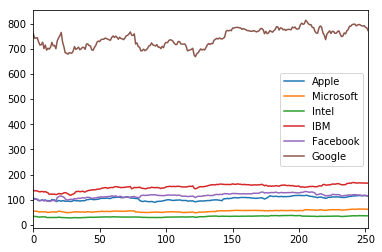

In [12]:
df_prices.plot(no)

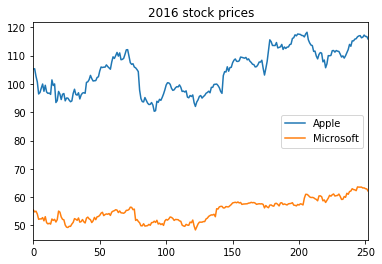

In [6]:
_ = df_prices[['Apple', 'Microsoft']].plot(title='2016 stock prices')

In [13]:
# Compute the daily relative increments
df_incs = df_prices.drop('Date', axis=1)
df_incs = ((df_incs - df_incs.shift(1))/df_incs.shift(1)).loc[1:, :]
df_incs['Date'] = df_prices.Date
df_incs.head(10)

,Apple,Microsoft,Intel,IBM,Facebook,Google,Date
1,0.000855,-0.012257,-0.013353,-0.012135,-0.023314,-0.022454,2016-01-04
2,-0.025059,0.004562,-0.004707,-0.000735,0.004989,0.000998,2016-01-05
3,-0.019570,-0.018165,-0.022170,-0.005006,0.002336,0.001400,2016-01-06
4,-0.042205,-0.034783,-0.037485,-0.017090,-0.049043,-0.023170,2016-01-07
5,0.005288,0.003067,-0.010364,-0.009258,-0.006025,-0.016410,2016-01-08
6,0.016192,-0.000573,0.017455,0.012155,0.001849,0.002184,2016-01-11
7,0.014513,0.009178,0.019339,-0.002477,0.019075,0.014022,2016-01-12
8,-0.025710,-0.021599,-0.023562,-0.013017,-0.039549,-0.035134,2016-01-13
9,0.021871,0.028466,0.026011,0.013265,0.030700,0.020212,2016-01-14
10,-0.024015,-0.039917,-0.091020,-0.021669,-0.034563,-0.028361,2016-01-15


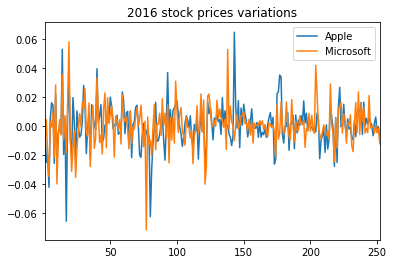

In [14]:
_ = df_incs[['Apple', 'Microsoft']].plot(title='2016 stock prices variations')

In [15]:
m = np.mean(df_incs)
print(m)

Apple        0.000488
Microsoft    0.000552
Intel        0.000307
IBM          0.000822
Facebook     0.000531
Google       0.000146
dtype: float64


In [16]:
s = np.std(df_incs, ddof=1)
print(s)

Apple        0.014722
Microsoft    0.014294
Intel        0.014265
IBM          0.012459
Facebook     0.017868
Google       0.012585
dtype: float64


In [17]:
c = df_incs.cov()
c

,Apple,Microsoft,Intel,IBM,Facebook,Google
Apple,0.000217,0.000103,0.000096,0.000054,0.000095,0.000088
Microsoft,0.000103,0.000204,0.000123,0.000078,0.000133,0.000125
Intel,0.000096,0.000123,0.000204,0.000089,0.000098,0.000089
IBM,0.000054,0.000078,0.000089,0.000155,0.000049,0.000053
Facebook,0.000095,0.000133,0.000098,0.000049,0.000319,0.000144
Google,0.000088,0.000125,0.000089,0.000053,0.000144,0.000158


## Create a Normal distribution

Let's assume that the stock prices follow a Normal distribution

In [18]:
# we can use the fit method to get the MLE of the mean and the std
stats.norm.fit(df_incs.Apple)

(0.00048759245549410914, 0.014692416094615581)

In [19]:
# Create estimated distributions based on the sample
app_dist = stats.norm(m['Apple'], s['Apple'])
win_dist = stats.norm(m['Microsoft'], s['Microsoft'])
intl_dist = stats.norm(m['Intel'], s['Intel'])

In [20]:
# We can test if this data fits a normal distribution (Kolmogorov-Smirnov test)
app_KS = stats.kstest(df_incs['Apple'], 'norm', [m['Apple'], s['Apple']])
win_KS = stats.kstest(df_incs['Microsoft'], 'norm', [m['Microsoft'], s['Microsoft']])
intl_KS = stats.kstest(df_incs['Intel'], 'norm', [m['Intel'], s['Intel']])
print('''Apple: {}
Microsoft: {}
Intel: {}'''.format(app_KS, win_KS, intl_KS))

Apple: KstestResult(statistic=0.092386462818809106, pvalue=0.025356084224903874)
Microsoft: KstestResult(statistic=0.084523602288904653, pvalue=0.051480622601846493)
Intel: KstestResult(statistic=0.094229160969390657, pvalue=0.021283793751813773)


![Ummmmmm](../resources/homer-doh.jpg)

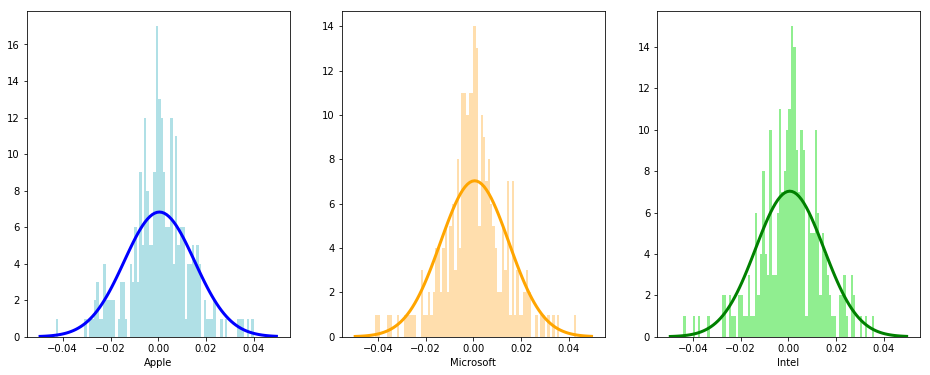

In [21]:
# Compare histogram with estimated distribution
x_range = np.arange(-0.05, +0.0501, 0.001)
x_axis = (x_range[1:] + x_range[:-1])/2.
n_incs = df_incs.shape[0]
y_app = (app_dist.cdf(x_range[1:]) - app_dist.cdf(x_range[:-1]))*n_incs
y_win = (win_dist.cdf(x_range[1:]) - win_dist.cdf(x_range[:-1]))*n_incs
y_intl = (intl_dist.cdf(x_range[1:]) - intl_dist.cdf(x_range[:-1]))*n_incs

fig = plt.figure(figsize=(16., 6.))
ax_app = fig.add_subplot(131)
_ = ax_app.hist(df_incs['Apple'], bins=x_range, color='powderblue')
_ = ax_app.set_xlabel('Apple')
_ = ax_app.plot(x_axis, y_app, color='blue', linewidth=3)
ax_win = fig.add_subplot(132)
_ = ax_win.hist(df_incs['Microsoft'], bins=x_range, color='navajowhite')
_ = ax_win.set_xlabel('Microsoft')
_ = ax_win.plot(x_axis, y_win, color='orange', linewidth=3)
ax_intl = fig.add_subplot(133)
_ = ax_intl.hist(df_incs['Intel'], bins=x_range, color='lightgreen')
_ = ax_intl.set_xlabel('Intel')
_ = ax_intl.plot(x_axis, y_win, color='green', linewidth=3)

## Exercise:

Imagine you are a product designer in a finantial company. You want to create a new investment product to be "sold" to your clients based on the future stock prices of some IT companies. The profit the client gets from his investement is calculated like this:
* At  the time of the investment we check the initial stock prices
* 12 months later (let's say 240 work days), the client gets 100% of the investement back. Additionally if all stock prices are higher than the initial ones, the client earns half the lowest increment (in %). 

**What is the expected profit of this investment?**

**What is the 5% highest risk that the finantial company is assuming?**

First we will try to create a finantial product based on the stock prices of Apple and Microsoft

### Create a multinormal distribution

In [ ]:
# Create a multivariate normal distribution object
m_norm = stats.multivariate_normal(m[['Apple', 'Microsoft']], df_incs[['Apple', 'Microsoft']].cov())

In [ ]:
# Show the contour plot of the pdf
x_range = np.arange(-0.05, +0.0501, 0.001)
x, y = np.meshgrid(x_range, x_range)

pos = np.dstack((x, y))
fig_m_norm = plt.figure(figsize=(6., 6.))
ax_m_norm = fig_m_norm.add_subplot(111)
ax_m_norm.contourf(x, y, m_norm.pdf(pos), 50)
_ = ax_m_norm.set_xlabel('Apple')
_ = ax_m_norm.set_ylabel('Microsoft')

### Compute the expected profit and top 5% risk

In [ ]:
# Create N (e.g 1000) random simulations of the daily relative increments with 240 samples
N_SIMS = 1000
daily_incs = m_norm.rvs(size=[240, N_SIMS])

In [ ]:
# Calculate yearly increments (from the composition of the daily increments)
year_incs = (daily_incs + 1.).prod(axis=0)

In [ ]:
# calculate the amount payed for each simulation
def amount_to_pay(a):
    if np.all( a >= 1.):
        return (a.min() - 1)/2
    else:
        return 0.
earnings = np.apply_along_axis(amount_to_pay, 1, year_incs)

In [ ]:
_ = plt.hist(earnings, bins=50)

In [ ]:
print('Expected profit of the investment: {:.2%}'.format(earnings.mean()))

In [ ]:
# To compute the 5% higher profit use the stats.scoreatpercentile function
print('%5 higher profit of the investment: {:.2%}'.format(stats.scoreatpercentile(earnings, 95)))
print('%1 higher profit of the investment: {:.2%}'.format(stats.scoreatpercentile(earnings, 99)))

Both the expected profit and the risk assessed are too high!!

**Try adding Intel to the product in order to lower them down**

In [ ]:
# %load -r 2:10 solutions/07_02_scipy_stats.py